In [1]:
import numpy as np
from numpy import tanh, cosh, sinh, exp, sqrt
import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes    # zoomed up image libraries
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.style as style 
style.use('tableau-colorblind10')

In [2]:
J,Ns = 1.0,50        #J, number of spins
h=0.02 #external field

#generating theorecal curves
points=100
Tlin = np.linspace(0.2,3.0,num=points)
b = 1/Tlin
th = tanh(J/Tlin)
thN= th**Ns
ch = 1/th
#predicted energy
ene = -J*( th + ch*thN )/( 1 + thN )
#predicted heat capacity
heat=((b*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
#compute predicted magnetisation (h!=0)
l1 = exp(b*J)*cosh(b*h)+sqrt(exp(2*b*J)*cosh(b*h)*cosh(b*h)-2*sinh(2*b*J))
l2 = exp(b*J)*cosh(b*h)-sqrt(exp(2*b*J)*cosh(b*h)*cosh(b*h)-2*sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (exp(b*J)*sinh(b*h)*((l1**(Ns-1))*(1+exp(b*J)*cosh(b*h)/sqrt(exp(2*b*J)*cosh(b*h)*cosh(b*h)-2*sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-exp(b*J)*cosh(b*h)/sqrt(exp(2*b*J)*cosh(b*h)*cosh(b*h)-2*sinh(2*b*J)))))/(Z)
#predicted susceptibility
X = b*exp(2*b*J)*(1-thN)/(1+thN)

obs_teo=(ene,heat,X,M)
title_obs=('Internal energy per particle','Specific heat per particle','Magnetic suscettivity','Magnetization per particle')

In [10]:
J,Ns = 1.0,50        #J, number of spins
h=0.02 #external field

nburn=5000
T=(0.5,0.95,2.)
eteo=[-J*( (tanh(J/t)) + (1/(tanh(J/t)))*((tanh(J/t))**Ns) )/( 1 + ((tanh(J/t))**Ns) )*Ns for t in T]
title=('First 500 points','last 1000 points'); labteo=['expected <U>','','']

def graph_burn(ifMetro, iffield):
    if ifMetro: name="metropolis"
    else: name="gibbs"
    
    if iffield: field="0.02"
    else: field="0"

    burn1=np.genfromtxt('build/equilibration/'+name+'/'+field+'/0.5/results_eq/instant.ene.0',names='x,u')
    burn2=np.genfromtxt('build/equilibration/'+name+'/'+field+'/0.95/results_eq/instant.ene.0',names='x,u')
    burn3=np.genfromtxt('build/equilibration/'+name+'/'+field+'/2.0/results_eq/instant.ene.0',names='x,u')
    burn=(burn1,burn2,burn3); labT=['T='+str(temp) for temp in T]
    
    pl.figure(figsize=(15,4))
    for i in range(2):
        pl.subplot(1,2,i+1)
        for j in range(3): pl.plot(burn[j]['x'],burn[j]['u'],label=labT[j])
        for j in range(3): pl.axhline(y=eteo[j],color='k',linewidth=0.8,label=labteo[j])
        if i==0: pl.xlim(-1,100)
        elif i==1: pl.xlim(nburn-500,nburn)
        if(i==0): pl.legend(loc='center left', bbox_to_anchor=(0, 1.35))
        pl.xlabel('$N_{burn}$')
        if i==0: pl.ylabel('$U$',labelpad=15)
        pl.title(title[i])
        pl.grid(True)
    pl.suptitle('Equilibration, '+name+' sampling')
    pl.show()

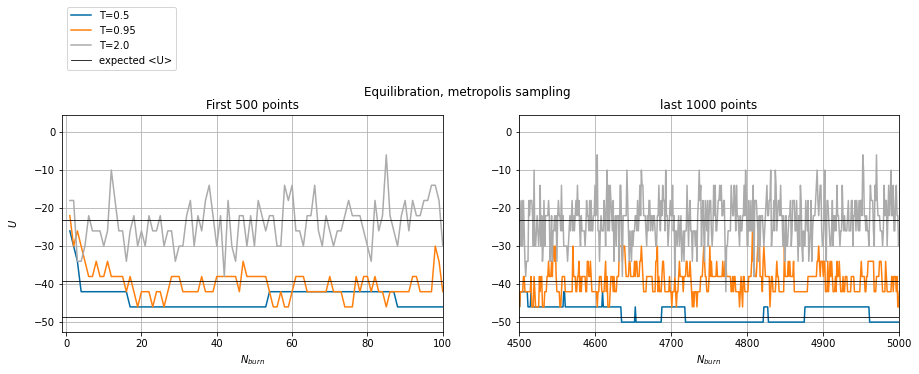

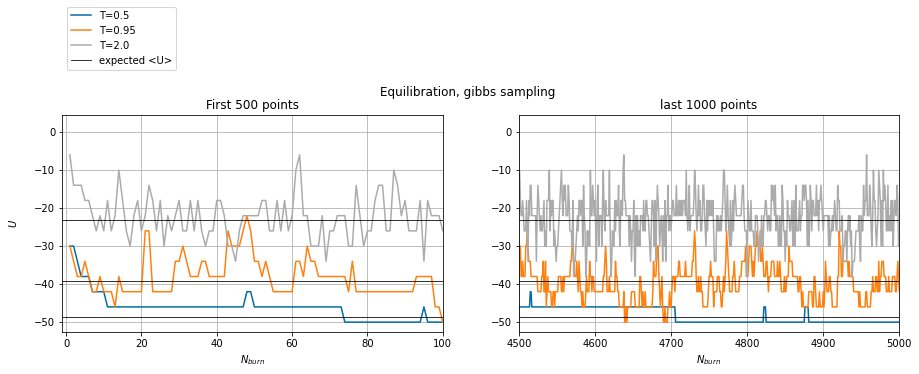

In [11]:
graph_burn(True, False)
graph_burn(False, False)

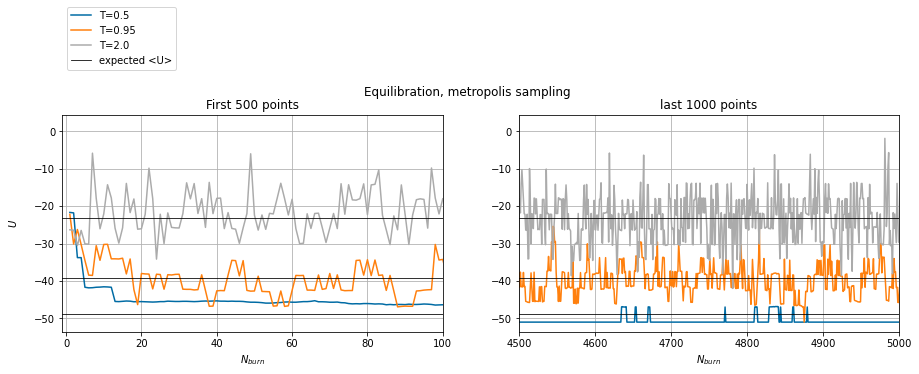

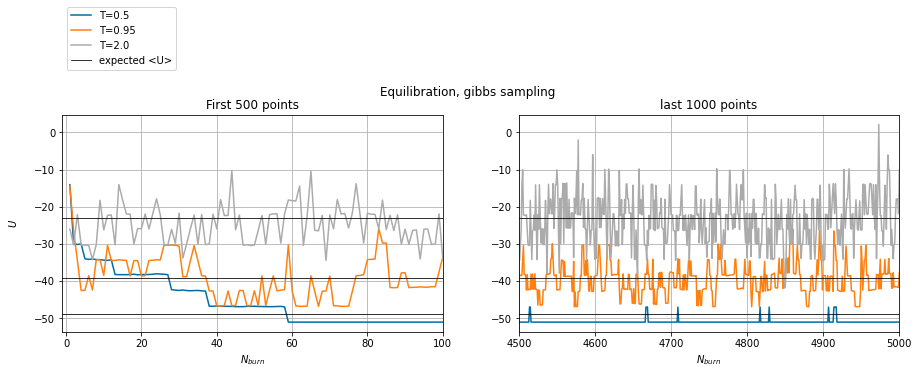

In [12]:
graph_burn(True, True)
graph_burn(False, True)

In [15]:
def obs_graph(obs_name):
    if obs_name=='ene': obs_ind=0; ylab='U'
    elif obs_name=='heat': obs_ind=1; ylab='C' 
    elif obs_name=='chi': obs_ind=2; ylab='\chi'
    elif obs_name=='mag': obs_ind=3; ylab='M'
    
    namefolder='build/ex06.1/'
    metro=np.genfromtxt(namefolder+'/metropolis/'+obs_name+'.dat',names='T,res,err')
    gibbs=np.genfromtxt(namefolder+'/gibbs/'+obs_name+'.dat',names='T,res,err')
    obs=(metro,gibbs); label=('Metropolis','Gibbs')
    
    fig,ax=pl.subplots(figsize=(12,6))
    for i in range(2): pl.errorbar(obs[i]['T'],obs[i]['res'],yerr=obs[i]['err'],label=label[i])
    pl.plot(Tlin,obs_teo[obs_ind],color='k',linewidth=0.8,label='expected $<'+ylab+'/N>$')
    pl.xlim(0.4,2.1)
    if obs_name=="chi": pl.ylim(-10,140)
    pl.legend(loc='best')
    pl.xlabel('$T$')
    pl.ylabel('$'+ylab+'/N\ (T)$',labelpad=15)
    pl.title(title_obs[obs_ind])
    pl.grid(True)
    
    if obs_name=="heat":    #zoomed part for heat
        axins=zoomed_inset_axes(ax,2.8,loc=8)   # axes instance zoomed, zoom and position
        for i in range(2): axins.errorbar(obs[i]['T'],obs[i]['res'],yerr=obs[i]['err'])
        axins.plot(Tlin,obs_teo[obs_ind],color='k',linewidth=0.8)
        axins.set_xlim(0.52,0.92)
        axins.set_ylim(0.38,0.46)
        pl.grid(True)
        pl.yticks(visible=False)
        pl.xticks(visible=False)
        mark_inset(ax,axins,loc1=1,loc2=3,fc='none',ec='0.6')
        
    if obs_name=="chi":    #zoomed part for chi
        axins=zoomed_inset_axes(ax,2.8,loc='center right')   # axes instance zoomed, zoom and position
        for i in range(2): axins.errorbar(obs[i]['T'],obs[i]['res'],yerr=obs[i]['err'])
        axins.plot(Tlin,obs_teo[obs_ind],color='k',linewidth=0.8)
        axins.set_xlim(0.58,0.8)
        axins.set_ylim(15,45)
        pl.grid(True)
        pl.yticks(visible=False)
        pl.xticks(visible=False)
        mark_inset(ax,axins,loc1=1,loc2=3,fc='none',ec='0.6')
    
    pl.show()

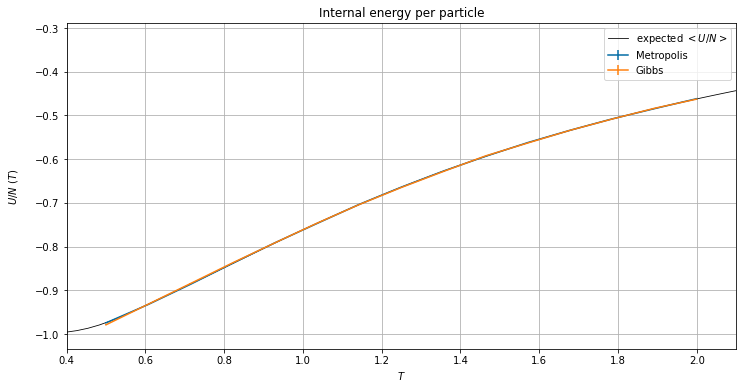

In [16]:
obs_graph("ene")

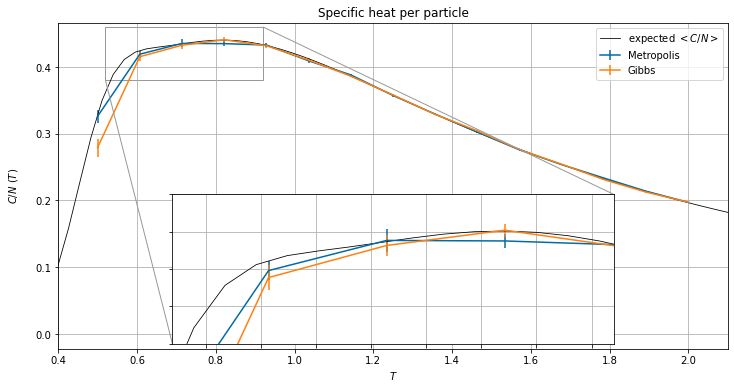

In [17]:
obs_graph("heat")

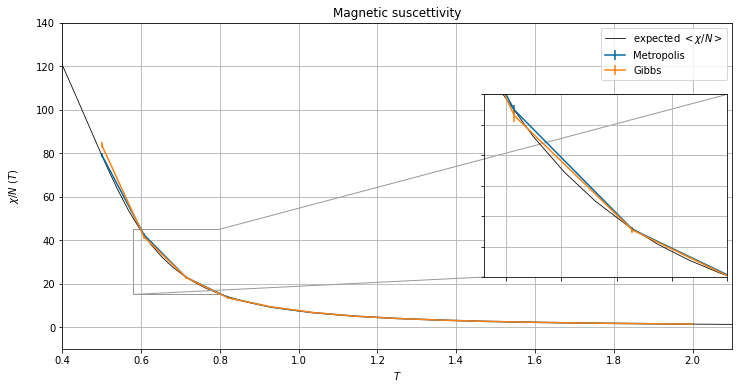

In [18]:
obs_graph("chi")

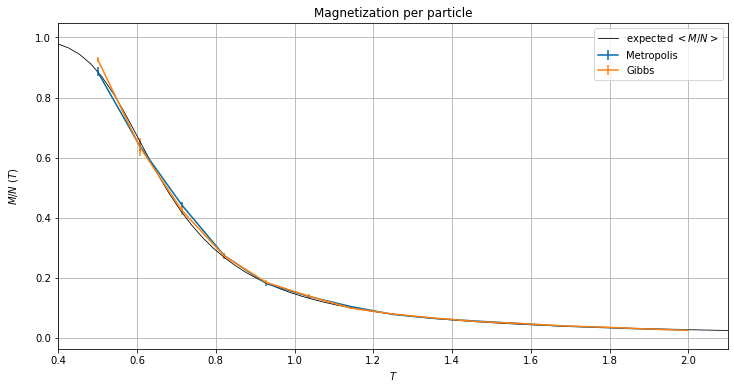

In [19]:
obs_graph("mag")